<a href="https://colab.research.google.com/github/emilya6206/Cs4701/blob/main/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

uni ea3182 Emily Arron

# MNIST Sign Language

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout



In [260]:
class SignLanguage:
    def __init__(self):
      self.model = None
      self.data = {
          "train": None,
          "test" : None
      }
      self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """


        # TODO: Create a Sequential model
        self.model = keras.Sequential([
            keras.layers.InputLayer(input_shape=(28,28,1)),
            keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dropout(0.35),
            keras.layers.Dense(26, activation="softmax")
        ]
        )


        # TODO: Compile the model with categorical_crossentropy
        self.model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])


    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """

        images = images.astype("float32") / 255.0

        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)

        images = images.reshape((-1, 28, 28, 1))

        x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 42, shuffle = True)
        self.data = {
            "train": (x_train, y_train), # (x_train, y_train)
            "test" : (x_test, y_test), # (x_test, y_test)
        }
        self.visualize_data((x_train, y_train))

    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """

        if self.data["train"] is None:
            return None

        x_train, y_train = self.data["train"]
        x_test, y_test = self.data["test"]


        history = self.model.fit(
            x_train, y_train,
            validation_data=(x_test, y_test),
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose
        )
        return history

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help

        data = data.astype("float32") / 255.0
        data = data.reshape((-1, 28, 28, 1))

        predictions = self.model.predict(data)

        return np.argmax(predictions, axis=1)

    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [261]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)



(27455, 784) (27455,) (2416, 784) (2416,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


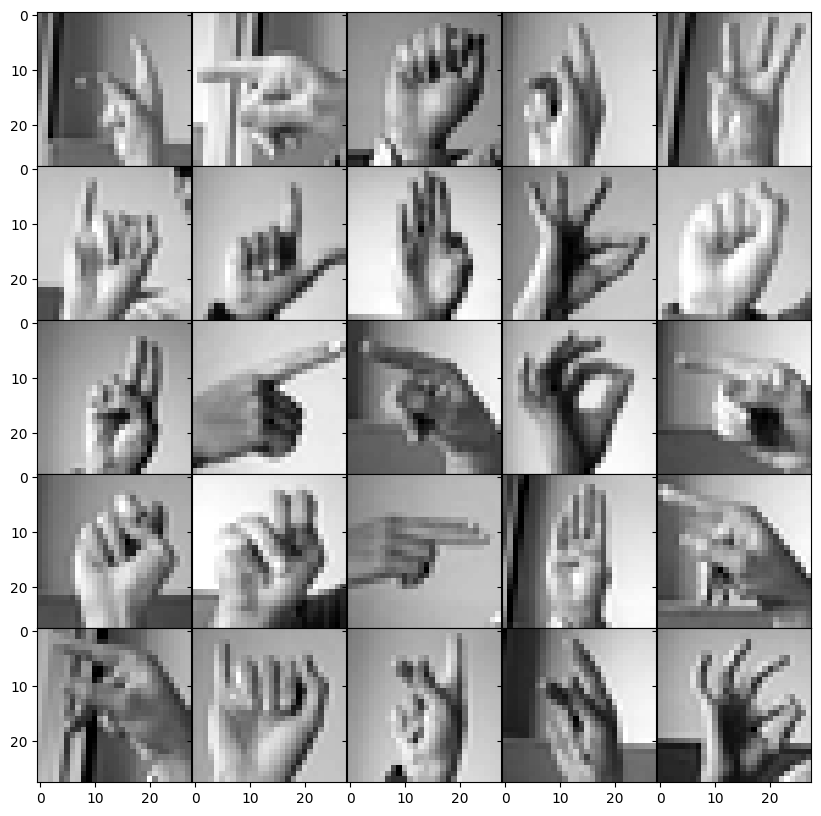

In [262]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

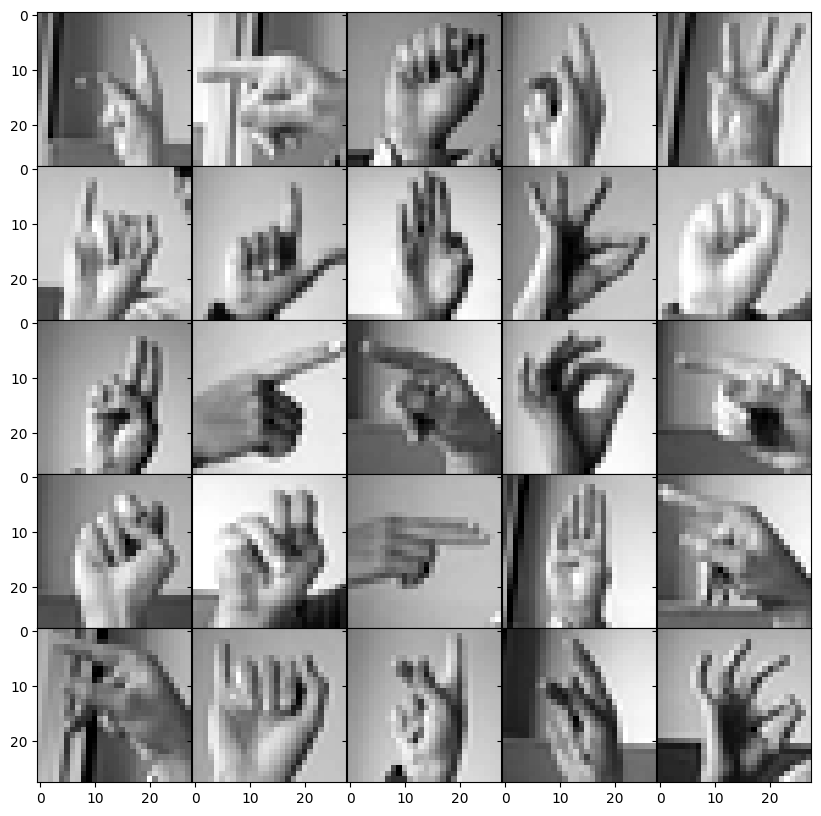

In [263]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.5548 - loss: 1.5795 - val_accuracy: 0.1018 - val_loss: 3.1171
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9907 - loss: 0.0426 - val_accuracy: 0.5296 - val_loss: 1.6093
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - loss: 0.0153 - val_accuracy: 0.9545 - val_loss: 0.1617
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 0.9920 - val_loss: 0.0396
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9978 - loss: 0.0103 - val_accuracy: 0.9940 - val_loss: 0.0222
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9995 - loss: 0.0040 - val_accuracy: 0.9989 - val_loss: 0.0070
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9559 - val_loss: 0.1403
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9947 - loss: 0.0200 - val_accuracy: 

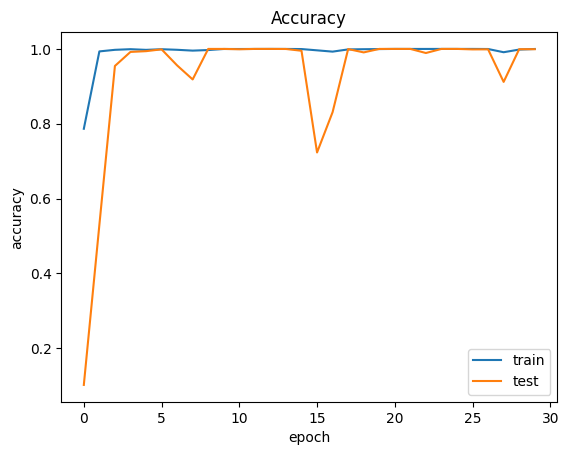

In [264]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [265]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
0.9292218543046358
